In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#sklearn.__version__
import seaborn as sn
import imblearn
#imblearn.__version__


In [3]:
xr=pd.read_csv("x_train_fourteen.csv")
xr.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,34954,64,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
1,443,402,2,0,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
2,80,4,2,0,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,443,265723,11,9,559,6302,186,0,50.818182,74.593322,...,10,20,0.0,0.0,0,0,0.0,0.0,0,0
4,80,764459,3,5,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0


In [4]:
yr=pd.read_csv("y_train_fourteen.csv")
yr.head()

,Label
0,0
1,0
2,4
3,0
4,2


In [5]:
yr.shape

(2262300, 1)

In [6]:
xr.shape

(2262300, 78)

In [7]:
yr = yr.to_numpy()
xr=xr.to_numpy()

<function matplotlib.pyplot.show(*args, **kw)>

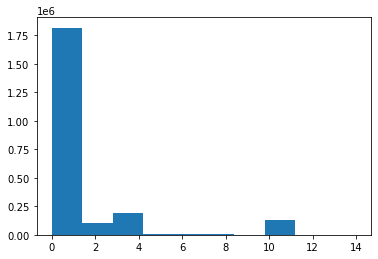

In [8]:
plt.hist(yr)
plt.show

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#model.fit(x_train, y_train)
model.fit(xr, yr.ravel())

RandomForestClassifier()

In [11]:
x_test=pd.read_csv("x_test_fourteen.csv")
x_test.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,259,2,2,66,194,33,33,33.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,53,65995,1,1,57,128,57,57,57.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
2,443,99250,10,5,599,559,357,0,59.9,114.065722,...,5,32,0.0,0.0,0,0,0.0,0.0,0,0
3,2522,65,2,2,4,12,2,2,2.0,0.000000,...,1,24,0.0,0.0,0,0,0.0,0.0,0,0
4,443,5696200,10,7,355,4923,198,0,35.5,69.473016,...,3,32,179405.0,0.0,179405,179405,5516780.0,0.0,5516780,5516780


In [12]:
y_test=pd.read_csv("y_test_fourteen.csv")
y_test.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [11]:
model.score(x_test, y_test)

0.9984811943929728

In [13]:
import joblib

In [14]:
#joblib.dump(model,'model_joblib_real')

['model_joblib_real']

In [14]:
mj=joblib.load('model_joblib_real')

In [15]:
mj.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
mj.score(x_test,y_test)

0.9984811943929728

In [17]:
y_test.iloc[19]

Label    2
Name: 19, dtype: int64

In [18]:
mj.predict([x_test.iloc[19]])

array([2], dtype=int64)

In [19]:
clf = mj.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
y=confusion_matrix(y_test, clf)
y

array([[454305,     34,      1,      1,     60,      4,      0,      0,
             0,      0,    249,      0,      2,      0,      0],
       [    93,    285,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     5,      0,  25571,      0,      2,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     7,      0,      0,   1993,      3,      1,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    52,      0,      0,      4,  45721,      0,      0,      0,
             0,      0,      1,      0,      1,      0,      0],
       [     2,      0,      0,      0,      0,   1091,      8,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     2,      0,      0,      0,      0,      4,   1151,      0,
             0,      0,      0,      0,      1,      0,      0],
       [     3,      0,      0,      0,  

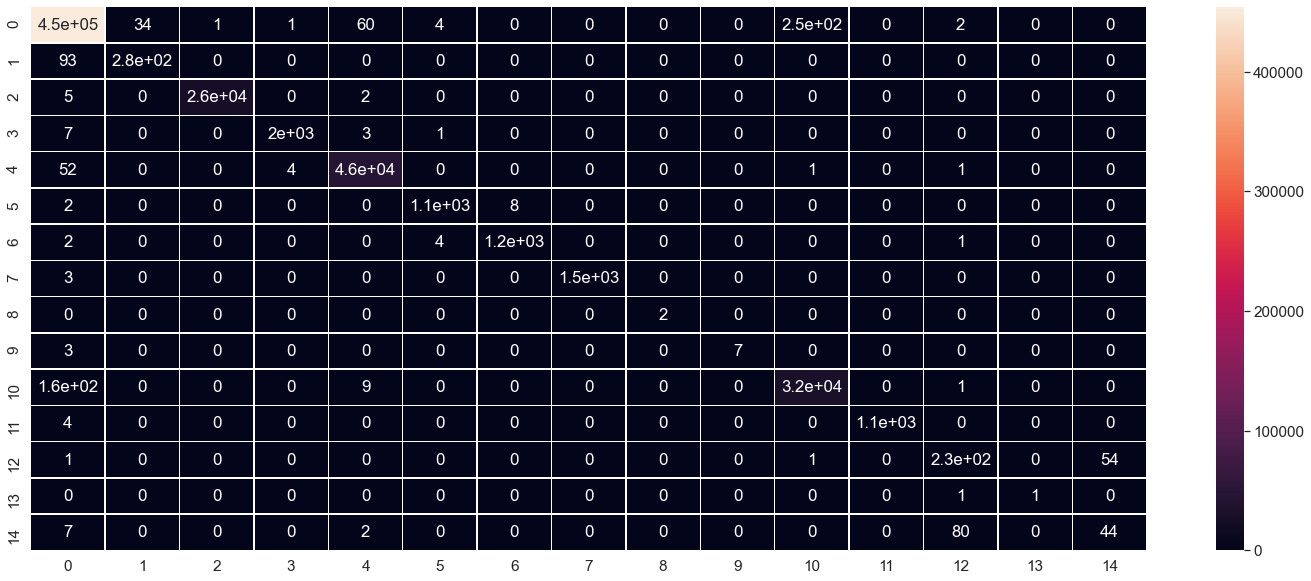

In [21]:
plt.figure(figsize = (25,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(y, annot=True,linewidths=.5)